In [26]:
import numpy as np
import sys,os
import pickle, gzip
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def create_index(df):
    # create index col and remove source columns
    df["id"] = df.apply(lambda row: str(int(row["sample"])) + "_" + str(int(row["segment"])) + "_" + str(int(row["frame"])), axis=1)
    df.set_index("id", inplace=True)

In [10]:
emb = pd.read_csv("test_emb_pca.csv.gz")
emb = emb.rename(columns=lambda x: x.strip())
create_index(emb)

In [12]:
labels = pd.read_csv("test_labels.csv.gz")
labels = labels.rename(columns=lambda x: x.strip())
create_index(labels)

In [14]:
emb = emb.loc[labels.index]

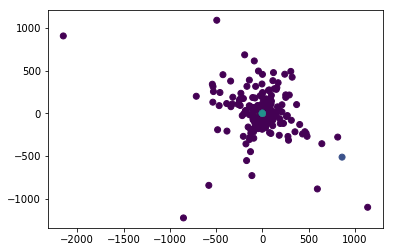

In [56]:
limit = 99999999
plt.scatter(x=emb[:limit]["0"], y=emb[:limit]["1"], c=labels[:limit]["label"]);

In [75]:
limit = 1000
data = emb[:limit][["0","1"]]
from sklearn.manifold import TSNE
model = TSNE(n_components=2,random_state=1)
edata = model.fit_transform(data)

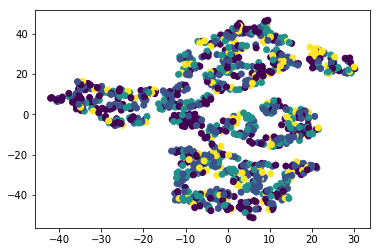

In [76]:
plt.scatter(x=edata[:limit,0], y=edata[:limit,1], c=labels[:limit]["label"]);